## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.724258  0.650668  0.826957 -0.991288 -0.818422 -0.752055
1  1.400236 -1.574370  0.906542  1.111450 -0.822451 -0.508183
2 -1.551083 -0.478408  0.168036 -1.556215 -0.591950 -2.199491
3  0.453621  1.393474  1.612546 -0.175438 -1.125077  0.773417
4 -0.896379 -1.569885 -1.543157  1.365070 -1.245368 -0.142489


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9866140	total: 68.9ms	remaining: 1m 8s
1:	learn: 0.9779967	total: 69.4ms	remaining: 34.7s
2:	learn: 0.9657873	total: 69.9ms	remaining: 23.2s
3:	learn: 0.9547641	total: 70.5ms	remaining: 17.6s
4:	learn: 0.9440492	total: 71.1ms	remaining: 14.1s
5:	learn: 0.9343670	total: 71.6ms	remaining: 11.9s
6:	learn: 0.9228112	total: 72.1ms	remaining: 10.2s
7:	learn: 0.9139843	total: 72.7ms	remaining: 9.02s
8:	learn: 0.9056118	total: 73.1ms	remaining: 8.05s
9:	learn: 0.8958300	total: 73.7ms	remaining: 7.29s
10:	learn: 0.8868424	total: 74.1ms	remaining: 6.66s
11:	learn: 0.8763337	total: 74.6ms	remaining: 6.14s
12:	learn: 0.8670538	total: 75.2ms	remaining: 5.71s
13:	learn: 0.8581124	total: 75.8ms	remaining: 5.34s
14:	learn: 0.8515237	total: 76.2ms	remaining: 5s
15:	learn: 0.8428837	total: 76.7ms	remaining: 4.72s
16:	learn: 0.8345356	total: 77.2ms	remaining: 4.46s
17:	learn: 0.8270593	total: 77.8ms	remaining: 4.24s
18:	learn: 0.8173445	total: 78.3ms	remaining: 4

84:	learn: 0.4413514	total: 110ms	remaining: 1.18s
85:	learn: 0.4375823	total: 110ms	remaining: 1.17s
86:	learn: 0.4340152	total: 111ms	remaining: 1.16s
87:	learn: 0.4302669	total: 111ms	remaining: 1.15s
88:	learn: 0.4266133	total: 112ms	remaining: 1.14s
89:	learn: 0.4229572	total: 112ms	remaining: 1.13s
90:	learn: 0.4196959	total: 113ms	remaining: 1.12s
91:	learn: 0.4165453	total: 113ms	remaining: 1.11s
92:	learn: 0.4129260	total: 113ms	remaining: 1.1s
93:	learn: 0.4093441	total: 114ms	remaining: 1.1s
94:	learn: 0.4063648	total: 114ms	remaining: 1.09s
95:	learn: 0.4026639	total: 115ms	remaining: 1.08s
96:	learn: 0.3998348	total: 115ms	remaining: 1.07s
97:	learn: 0.3962574	total: 115ms	remaining: 1.06s
98:	learn: 0.3931641	total: 116ms	remaining: 1.05s
99:	learn: 0.3897485	total: 116ms	remaining: 1.05s
100:	learn: 0.3868049	total: 117ms	remaining: 1.04s
101:	learn: 0.3833970	total: 117ms	remaining: 1.03s
102:	learn: 0.3804837	total: 118ms	remaining: 1.03s
103:	learn: 0.3775711	total: 1

248:	learn: 0.1350047	total: 188ms	remaining: 567ms
249:	learn: 0.1342129	total: 189ms	remaining: 566ms
250:	learn: 0.1335345	total: 189ms	remaining: 565ms
251:	learn: 0.1327980	total: 190ms	remaining: 563ms
252:	learn: 0.1320967	total: 190ms	remaining: 562ms
253:	learn: 0.1314313	total: 191ms	remaining: 560ms
254:	learn: 0.1306216	total: 191ms	remaining: 559ms
255:	learn: 0.1298911	total: 192ms	remaining: 557ms
256:	learn: 0.1289115	total: 192ms	remaining: 556ms
257:	learn: 0.1281132	total: 193ms	remaining: 554ms
258:	learn: 0.1273334	total: 193ms	remaining: 552ms
259:	learn: 0.1263531	total: 193ms	remaining: 551ms
260:	learn: 0.1254096	total: 194ms	remaining: 549ms
261:	learn: 0.1244743	total: 194ms	remaining: 548ms
262:	learn: 0.1239501	total: 195ms	remaining: 546ms
263:	learn: 0.1234167	total: 195ms	remaining: 545ms
264:	learn: 0.1225584	total: 196ms	remaining: 544ms
265:	learn: 0.1219660	total: 196ms	remaining: 542ms
266:	learn: 0.1211668	total: 197ms	remaining: 540ms
267:	learn: 

469:	learn: 0.0461765	total: 293ms	remaining: 331ms
470:	learn: 0.0458144	total: 294ms	remaining: 330ms
471:	learn: 0.0454597	total: 294ms	remaining: 329ms
472:	learn: 0.0452783	total: 295ms	remaining: 328ms
473:	learn: 0.0450125	total: 295ms	remaining: 327ms
474:	learn: 0.0448422	total: 295ms	remaining: 327ms
475:	learn: 0.0446525	total: 296ms	remaining: 326ms
476:	learn: 0.0443118	total: 296ms	remaining: 325ms
477:	learn: 0.0441389	total: 297ms	remaining: 324ms
478:	learn: 0.0438058	total: 297ms	remaining: 323ms
479:	learn: 0.0435626	total: 298ms	remaining: 323ms
480:	learn: 0.0433239	total: 298ms	remaining: 322ms
481:	learn: 0.0431630	total: 299ms	remaining: 322ms
482:	learn: 0.0429298	total: 300ms	remaining: 321ms
483:	learn: 0.0426908	total: 300ms	remaining: 320ms
484:	learn: 0.0424374	total: 301ms	remaining: 319ms
485:	learn: 0.0422405	total: 301ms	remaining: 318ms
486:	learn: 0.0419885	total: 302ms	remaining: 318ms
487:	learn: 0.0417896	total: 302ms	remaining: 317ms
488:	learn: 

641:	learn: 0.0224062	total: 371ms	remaining: 207ms
642:	learn: 0.0223390	total: 372ms	remaining: 207ms
643:	learn: 0.0222484	total: 372ms	remaining: 206ms
644:	learn: 0.0221661	total: 373ms	remaining: 205ms
645:	learn: 0.0220395	total: 373ms	remaining: 205ms
646:	learn: 0.0220226	total: 374ms	remaining: 204ms
647:	learn: 0.0219343	total: 374ms	remaining: 203ms
648:	learn: 0.0218839	total: 375ms	remaining: 203ms
649:	learn: 0.0218673	total: 376ms	remaining: 202ms
650:	learn: 0.0217717	total: 376ms	remaining: 202ms
651:	learn: 0.0216857	total: 376ms	remaining: 201ms
652:	learn: 0.0216694	total: 377ms	remaining: 200ms
653:	learn: 0.0215906	total: 377ms	remaining: 200ms
654:	learn: 0.0215067	total: 378ms	remaining: 199ms
655:	learn: 0.0214137	total: 378ms	remaining: 198ms
656:	learn: 0.0213977	total: 379ms	remaining: 198ms
657:	learn: 0.0213158	total: 379ms	remaining: 197ms
658:	learn: 0.0212395	total: 380ms	remaining: 197ms
659:	learn: 0.0212238	total: 380ms	remaining: 196ms
660:	learn: 

864:	learn: 0.0119371	total: 476ms	remaining: 74.3ms
865:	learn: 0.0119043	total: 477ms	remaining: 73.8ms
866:	learn: 0.0118975	total: 477ms	remaining: 73.2ms
867:	learn: 0.0118615	total: 478ms	remaining: 72.6ms
868:	learn: 0.0118548	total: 478ms	remaining: 72.1ms
869:	learn: 0.0118247	total: 478ms	remaining: 71.5ms
870:	learn: 0.0118181	total: 479ms	remaining: 70.9ms
871:	learn: 0.0117927	total: 479ms	remaining: 70.3ms
872:	learn: 0.0117542	total: 480ms	remaining: 69.8ms
873:	learn: 0.0117250	total: 480ms	remaining: 69.3ms
874:	learn: 0.0116877	total: 481ms	remaining: 68.7ms
875:	learn: 0.0116557	total: 481ms	remaining: 68.1ms
876:	learn: 0.0116241	total: 482ms	remaining: 67.6ms
877:	learn: 0.0115960	total: 482ms	remaining: 67ms
878:	learn: 0.0115866	total: 483ms	remaining: 66.5ms
879:	learn: 0.0115504	total: 483ms	remaining: 65.9ms
880:	learn: 0.0115101	total: 484ms	remaining: 65.3ms
881:	learn: 0.0114722	total: 484ms	remaining: 64.8ms
882:	learn: 0.0114338	total: 485ms	remaining: 64

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

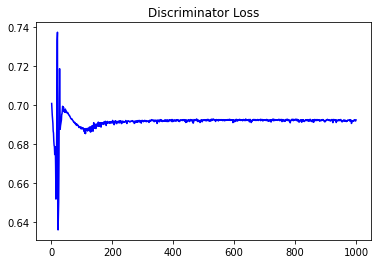

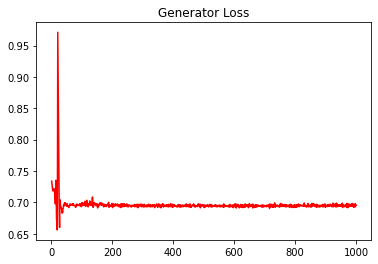

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.03413291038637227


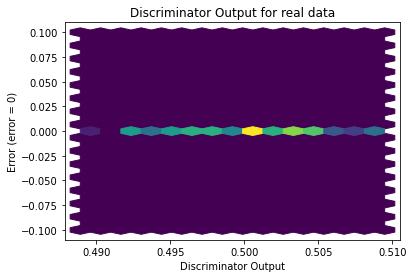

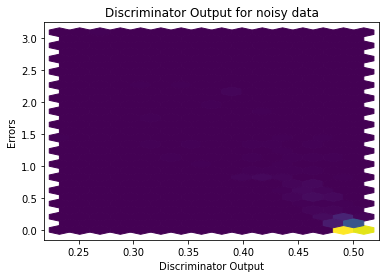

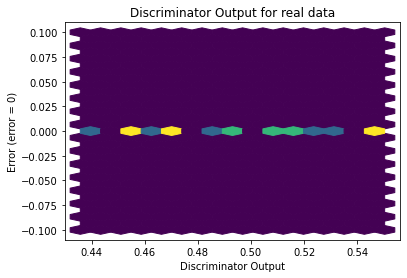

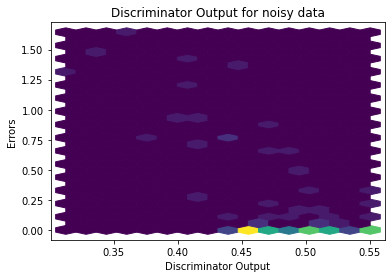

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


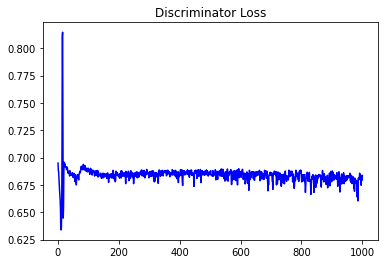

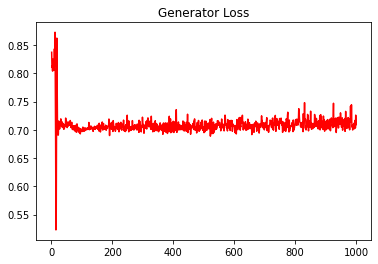

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.036869184803706795


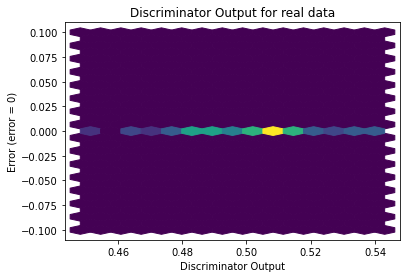

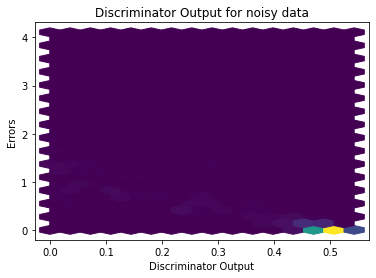

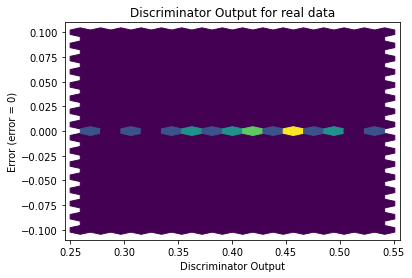

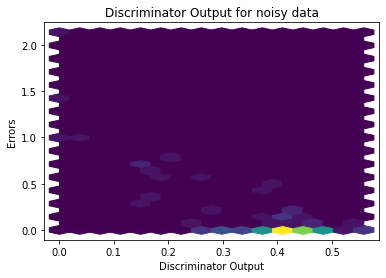

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1200]], requires_grad=True)
